In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('250k_rndm_zinc_drugs_clean_3.csv')
df.head()

,smiles,logP,qed,SAS
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n,5.05060,0.702012,2.084095
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1\n,3.11370,0.928975,3.432004
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182


In [10]:
from rdkit.Chem.Fragments import fr_COO
def is_mono_acid(mol):
    if fr_COO(mol) == 1:
        return True
    else:
        return False

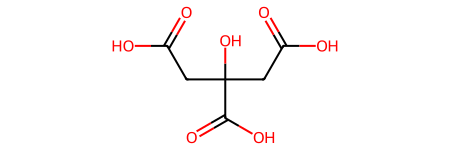

In [16]:
smi = 'OC(=O)CC(O)(C(=O)O)CC(=O)O'
mol = Chem.MolFromSmiles(smi)
mol

In [17]:
is_mono_acid(mol)

False

In [18]:
df['monoacid'] = df['smiles'].apply(lambda x: is_mono_acid(Chem.MolFromSmiles(x)))

In [19]:
df.head()

,smiles,logP,qed,SAS,monoacid
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n,5.05060,0.702012,2.084095,False
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1\n,3.11370,0.928975,3.432004,False
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633,False
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753,False
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182,False


In [20]:
df['monoacid'].value_counts()

False    240277
True       9178
Name: monoacid, dtype: int64

In [21]:
df[df['monoacid'] == True].head()

,smiles,logP,qed,SAS,monoacid
89,CCCCOc1ccccc1C[C@@H]([NH3+])C(=O)[O-]\n,-0.23160,0.687621,3.359962,True
105,CCN(CC)S(=O)(=O)c1ccc2nc(-c3ccncc3)cc(C(=O)[O-...,1.69080,0.645770,2.596314,True
106,CCCN(CC)c1cc[nH+]c(C(=O)[O-])c1\n,0.10050,0.707768,4.106739,True
109,C[C@H](CSc1ccc(C(=O)N(C)C)cn1)C(=O)[O-]\n,0.26150,0.732667,3.278620,True
196,Cc1ccc(S(=O)(=O)N2CCN(C(=O)[C@H]3CCCC[C@@H]3C(...,0.69264,0.744374,3.221303,True


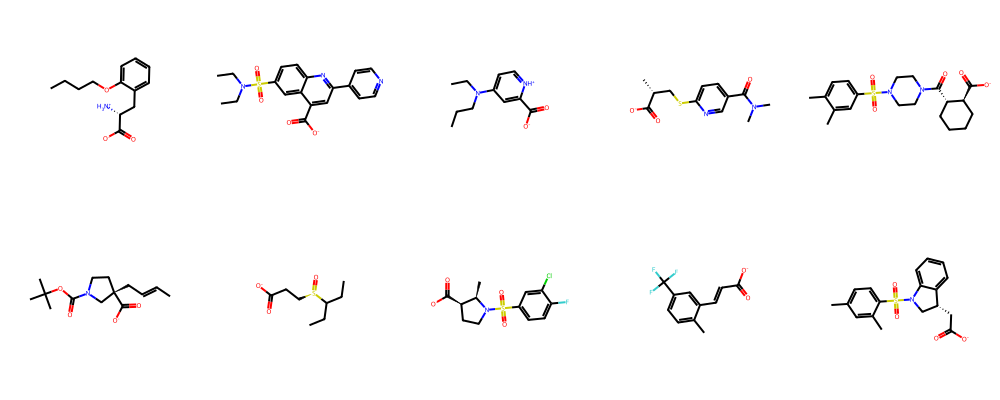

In [22]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in df[df['monoacid'] == True]['smiles'].values[:10]], molsPerRow=5, subImgSize=(200,200))

In [24]:
with open('/home/anton/PycharmProjects/cadd/data/parts/ligands_v3.smi') as f:
    smis_old = f.readlines()

In [25]:
# canonicize smiles
monoacid_df = df[df['monoacid'] == True]
monoacid_df['smiles'] = monoacid_df['smiles'].apply(lambda x: Chem.MolToSmiles(Chem.MolFromSmiles(x)))

/tmp/ipykernel_32274/2321227898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monoacid_df['smiles'] = monoacid_df['smiles'].apply(lambda x: Chem.MolToSmiles(Chem.MolFromSmiles(x)))


In [26]:
monoacid_df.head()

,smiles,logP,qed,SAS,monoacid
89,CCCCOc1ccccc1C[C@@H]([NH3+])C(=O)[O-],-0.23160,0.687621,3.359962,True
105,CCN(CC)S(=O)(=O)c1ccc2nc(-c3ccncc3)cc(C(=O)[O-...,1.69080,0.645770,2.596314,True
106,CCCN(CC)c1cc[nH+]c(C(=O)[O-])c1,0.10050,0.707768,4.106739,True
109,C[C@H](CSc1ccc(C(=O)N(C)C)cn1)C(=O)[O-],0.26150,0.732667,3.278620,True
196,Cc1ccc(S(=O)(=O)N2CCN(C(=O)[C@H]3CCCC[C@@H]3C(...,0.69264,0.744374,3.221303,True


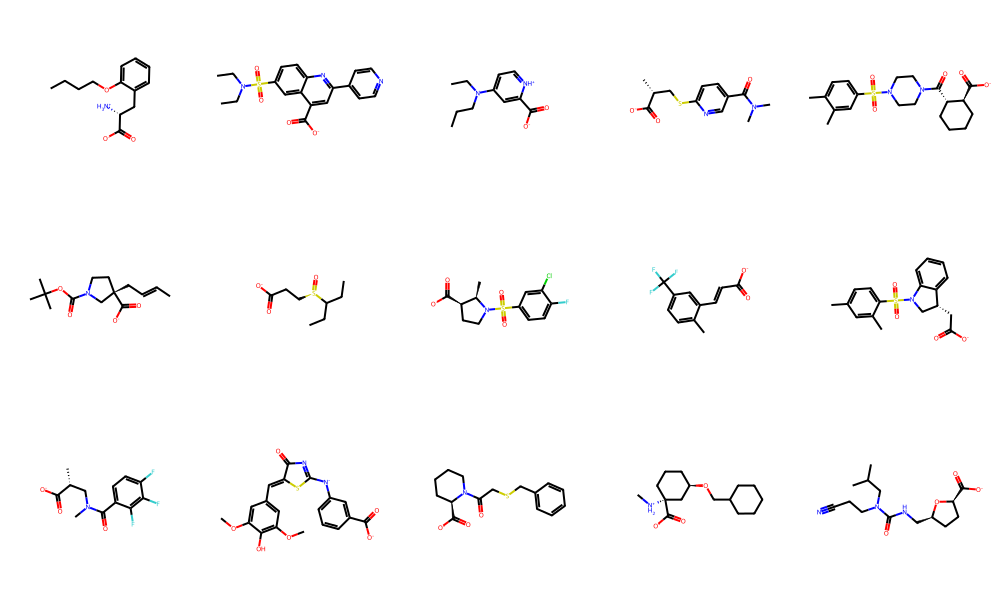

In [28]:
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in monoacid_df['smiles'].values[:15]], molsPerRow=5, subImgSize=(200,200))

In [30]:
len(smis_old)

416

In [33]:
count = 0
smi_new = []
for smi in monoacid_df['smiles'].values:
    if smi not in smis_old:
        count += 1
        smi_new.append(smi)

In [34]:
count

9178

In [40]:
smi_new = [smi + '\n' for smi in smi_new]

In [41]:
smi_v4 = smis_old + smi_new
len(smi_v4)

9594

In [48]:
from rdkit.Chem.MolStandardize import rdMolStandardize

uncharger = rdMolStandardize.Uncharger()
smi_v4_mols = [uncharger.uncharge(Chem.MolFromSmiles(smi)) for smi in smi_v4]
smi_v4 = [Chem.MolToSmiles(mol) for mol in smi_v4_mols]

[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Running Uncharger
[20:48:51] Run

In [52]:
with open('../data/parts/ligands_v4.smi', 'w+') as f:
    for smi in smi_v4:
        f.write(smi + '\n')

In [53]:
print('done')

done


In [51]:
len(set(smi_new))

9178

In [45]:
from itertools import product, combinations

ligs = [*range(9178)]
links = [*range(7)]
ps = [*range(7)]
len(ligs), len(links), len(ps)


(9178, 7, 7)

In [46]:
products = list(product(ligs, links, ps))
len(products)

449722